# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the data

In [2]:
data1= np.loadtxt("SN_m_tot_V2.0.txt") 
data1

array([[ 1.749000e+03,  1.000000e+00,  1.749042e+03,  9.670000e+01,
        -1.000000e+00, -1.000000e+00],
       [ 1.749000e+03,  2.000000e+00,  1.749123e+03,  1.043000e+02,
        -1.000000e+00, -1.000000e+00],
       [ 1.749000e+03,  3.000000e+00,  1.749204e+03,  1.167000e+02,
        -1.000000e+00, -1.000000e+00],
       ...,
       [ 2.022000e+03,  3.000000e+00,  2.022204e+03,  7.850000e+01,
         1.390000e+01,  1.277000e+03],
       [ 2.022000e+03,  4.000000e+00,  2.022286e+03,  8.410000e+01,
         1.520000e+01,  1.237000e+03],
       [ 2.022000e+03,  5.000000e+00,  2.022371e+03,  9.650000e+01,
         1.600000e+01,  1.250000e+03]])

In [3]:
time= data1[0:,2]
sunspot_count= data1[0:,3]

In [4]:
time.shape

(3280,)

In [5]:
sunspot_count.shape

(3280,)

In [6]:
time

array([1749.042, 1749.123, 1749.204, ..., 2022.204, 2022.286, 2022.371])

In [7]:
sunspot_count

array([ 96.7, 104.3, 116.7, ...,  78.5,  84.1,  96.5])

# Sunspot count vs time plot

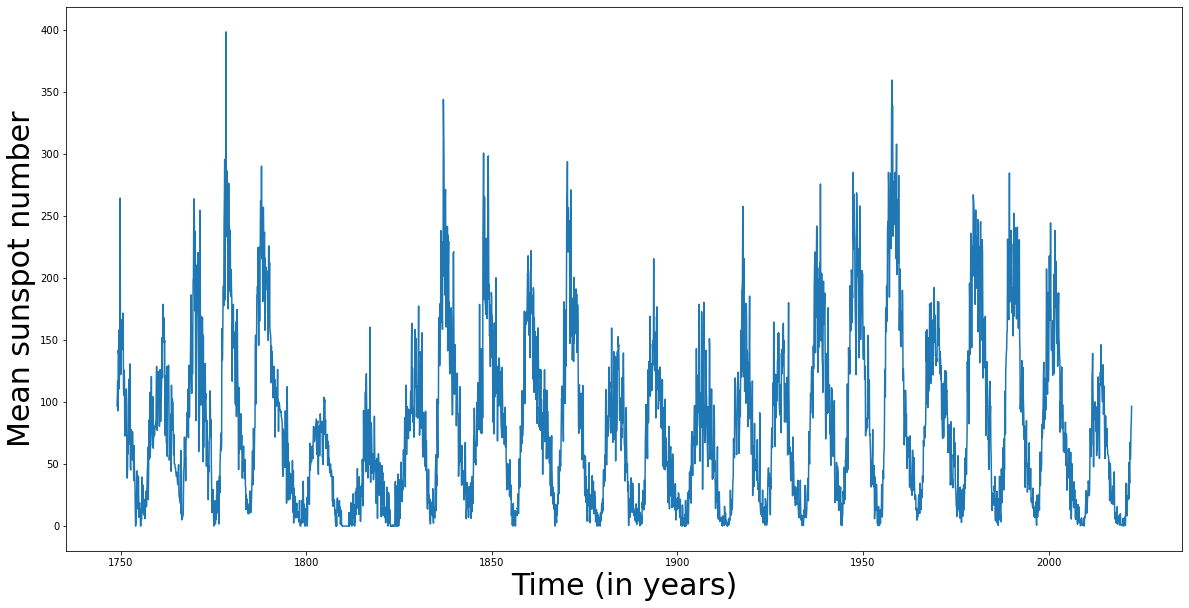

In [8]:
plt.figure(figsize=(20,10))
plt.plot(time,sunspot_count)
plt.xlabel('Time (in years)',fontsize=30)
plt.ylabel('Mean sunspot number',fontsize=30)
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.show()

from scipy.interpolate import make_interp_spline

plt.figure(figsize=(20,10))
X_Y_Spline = make_interp_spline(time, sunspot_count)
X_ = np.linspace(time.min(), time.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_,'r')
plt.plot(time,sunspot_count)
plt.xlabel('Time')
plt.ylabel('Sunspot count')
plt.show()

plt.figure(figsize=(20,10))
X_Y_Spline = make_interp_spline(time, sunspot_count)
X_ = np.linspace(time.min(), time.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_,'r')
plt.show()

plt.figure(figsize=(20,10))
X_Y_Spline = make_interp_spline(X_,Y_)
X1_ = np.linspace(X_.min(), X_.max(), 500)
Y1_ = X_Y_Spline(X1_)
plt.plot(X1_, Y1_,'m')
plt.show()

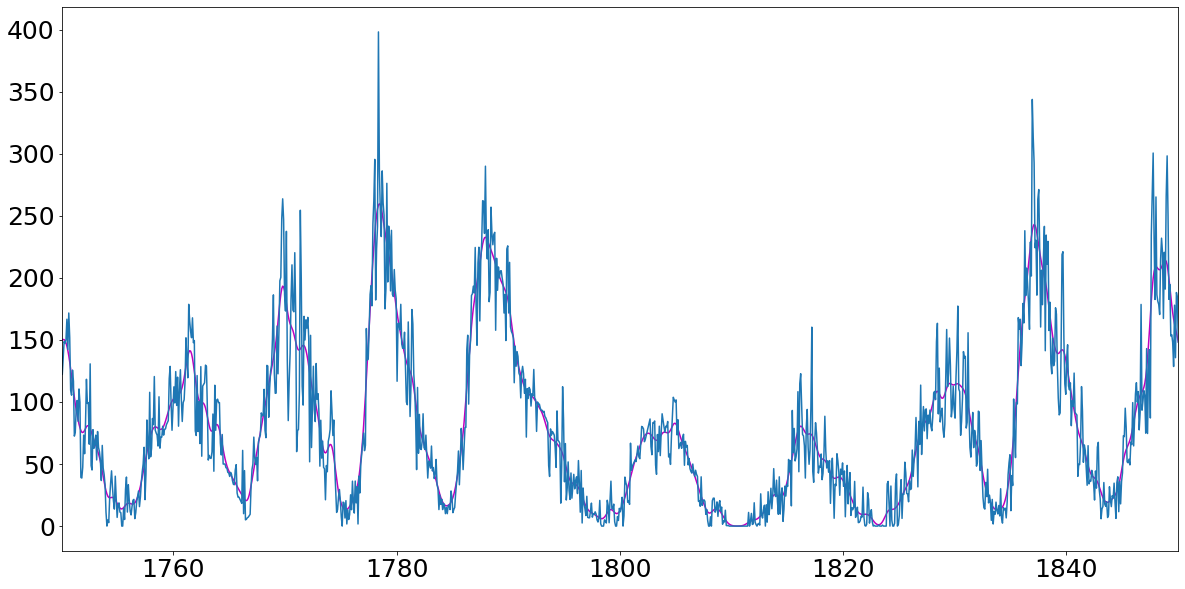

In [9]:
from scipy.ndimage import gaussian_filter1d

plt.figure(figsize=(20,10))
y_smoothed = gaussian_filter1d(sunspot_count, sigma=4)
plt.plot(time, y_smoothed,'m')
plt.plot(time,sunspot_count)
plt.xlim(1750,1850)
plt.show()

# Smooth plot:

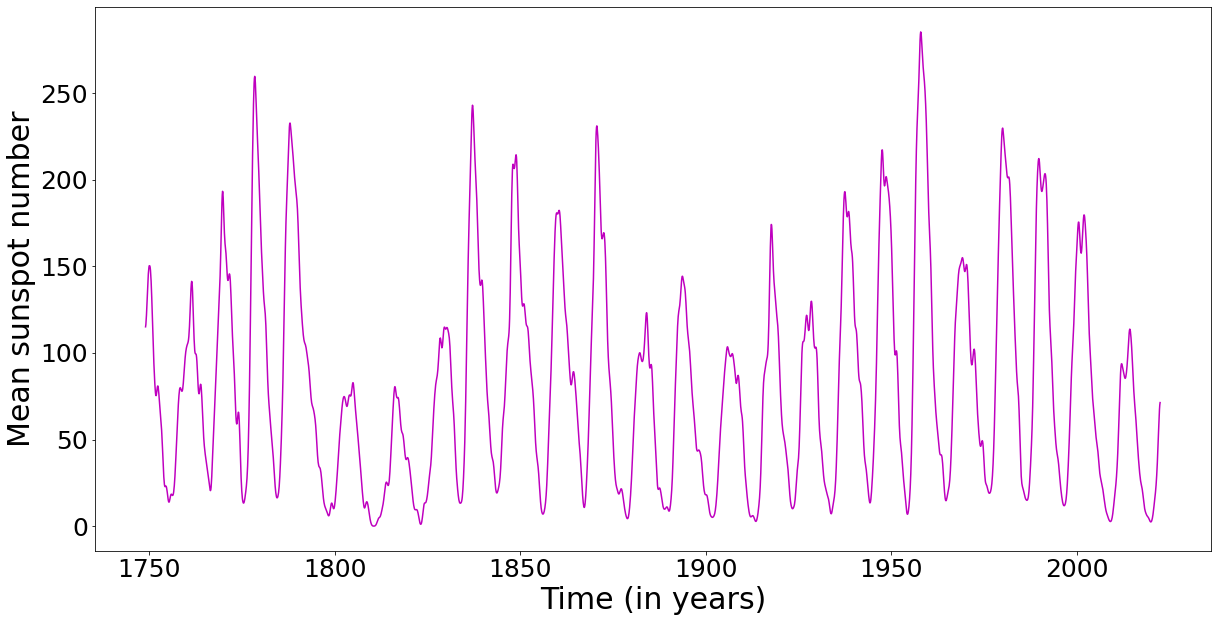

In [10]:
from scipy.ndimage import gaussian_filter1d

plt.figure(figsize=(20,10))
y_smoothed = gaussian_filter1d(sunspot_count, sigma=4)
plt.plot(time, y_smoothed,'m')
plt.xlabel('Time (in years)',fontsize=30)
plt.ylabel('Mean sunspot number',fontsize=30)
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.show()

# Finding the local maxima and minima:

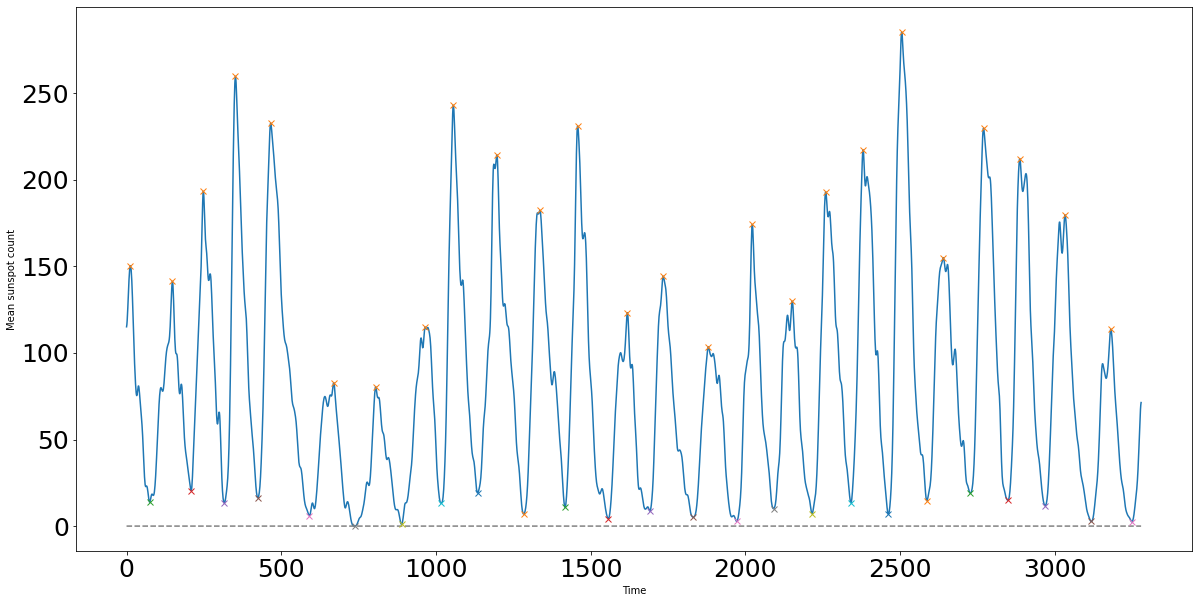

In [21]:
from scipy.signal import find_peaks

# for local maxima

plt.figure(figsize=(20,10))
peaks, _ = find_peaks(y_smoothed, height=50,distance=70)
plt.plot(y_smoothed)
plt.plot(peaks, y_smoothed[peaks], "x")
plt.plot(np.zeros_like(y_smoothed), "--", color="gray")
plt.plot(min,min_array,"x")
plt.xlabel('Time')
plt.ylabel('Mean sunspot count')
plt.show()

In [12]:
len(peaks)

25

In [13]:
### for local minima

from scipy.signal import argrelmin

min= argrelmin(y_smoothed, order=50)

min

(array([  75,  209,  316,  424,  591,  737,  889, 1017, 1135, 1284, 1417,
        1557, 1691, 1832, 1972, 2091, 2216, 2341, 2462, 2587, 2727, 2848,
        2969, 3118, 3249]),)

In [14]:
len(min[0])

25

In [15]:
max_array=[]
#max_array= np.array(max_array)
min_array=[]
#min_array= np.array(min_array)

In [16]:
for i in peaks:
    q= y_smoothed[i]
    max_array.append(q)
    
print(max_array)

[150.38459393479786, 141.3290431973292, 193.34942071371023, 259.72490276836885, 232.77336139337268, 82.8184758443654, 80.54390280708435, 114.9244146300169, 243.04885939733174, 214.43640437723872, 182.36656277939983, 231.1321426799071, 123.23329416523626, 144.28711251697064, 103.55555475570733, 174.20453062249462, 129.84763024451334, 193.12467560403002, 217.23972100861454, 285.3894098552806, 155.03306525603944, 229.84730116163095, 212.2433864349246, 179.7352922866852, 113.75548640548753]


In [17]:
for i in min:
    q= y_smoothed[i]
    min_array.append(q)
    
print(min_array)

[array([13.83955036, 20.51565083, 13.29764108, 16.34364385,  5.97199432,
        0.02594058,  1.07741086, 13.24709381, 19.14998971,  6.95974116,
       10.7733805 ,  4.31706559,  8.67083887,  5.08539171,  2.72471071,
       10.06056588,  7.16054664, 13.41290255,  6.85769816, 14.69776295,
       18.97759918, 14.92498955, 11.80056924,  2.6726768 ,  2.429325  ])]


In [18]:
max_times=[]
min_times=[]

In [19]:
for i in peaks:
    q= time[i]
    max_times.append(q)
    
print(max_times)

[1750.042, 1761.455, 1769.79, 1778.455, 1787.958, 1804.958, 1816.206, 1829.538, 1837.123, 1848.874, 1860.456, 1870.623, 1884.042, 1893.707, 1905.79, 1917.623, 1928.456, 1937.455, 1947.538, 1957.874, 1969.123, 1979.958, 1989.707, 2001.874, 2014.204]


In [20]:
for i in min:
    q= time[i]
    min_times.append(q)
    
print(min_times)

[array([1755.371, 1766.538, 1775.455, 1784.456, 1798.371, 1810.538,
       1823.204, 1833.874, 1843.707, 1856.124, 1867.204, 1878.874,
       1890.042, 1901.79 , 1913.455, 1923.371, 1933.79 , 1944.206,
       1954.288, 1964.708, 1976.373, 1986.455, 1996.54 , 2008.958,
       2019.873])]


# Saving the txt file:

In [22]:
np.savetxt('max_min',np.vstack((max_times,max_array,min_times,min_array)).T,fmt='% 10.2f %10.2f %10.2f %10.2f')

In [23]:
len(max_array)

25

In [24]:
len(min_array[0])

25

In [25]:
len(max_times)

25

In [26]:
len(min_times[0])

25

In [28]:
min_array

[array([13.83955036, 20.51565083, 13.29764108, 16.34364385,  5.97199432,
         0.02594058,  1.07741086, 13.24709381, 19.14998971,  6.95974116,
        10.7733805 ,  4.31706559,  8.67083887,  5.08539171,  2.72471071,
        10.06056588,  7.16054664, 13.41290255,  6.85769816, 14.69776295,
        18.97759918, 14.92498955, 11.80056924,  2.6726768 ,  2.429325  ])]

In [29]:
min_times

[array([1755.371, 1766.538, 1775.455, 1784.456, 1798.371, 1810.538,
        1823.204, 1833.874, 1843.707, 1856.124, 1867.204, 1878.874,
        1890.042, 1901.79 , 1913.455, 1923.371, 1933.79 , 1944.206,
        1954.288, 1964.708, 1976.373, 1986.455, 1996.54 , 2008.958,
        2019.873])]

In [30]:
min

(array([  75,  209,  316,  424,  591,  737,  889, 1017, 1135, 1284, 1417,
        1557, 1691, 1832, 1972, 2091, 2216, 2341, 2462, 2587, 2727, 2848,
        2969, 3118, 3249]),)

In [31]:
y_smoothed.shape

(3280,)

# Rise rates:

In [32]:
slopes_12=[]
slopes_18=[]
slopes_24=[]

In [33]:
for i in min:
    k=i+6
    f=k+6
    ds= y_smoothed[f]- y_smoothed[k]
    dt= time[f]-time[k]
    slope= ds/dt
    slopes_12.append(slope)

In [34]:
slopes_12

[array([-0.91661099, 51.36062107, 24.8255483 , 39.61429971,  3.75168644,
         5.1969501 , 13.62216704, 40.41133667, 20.64427564, 25.8806221 ,
        46.40013291, 29.50676168, 35.89060321, 14.7287227 , 20.1246005 ,
        25.39287622, 15.94836033, 41.29918093, 44.89818034, 14.6214806 ,
        28.03410803, 32.90473558, 31.632821  , 17.3186628 , 17.84103656])]

In [35]:
for i in min:
    k=i+6
    f=k+12
    ds= y_smoothed[f]- y_smoothed[k]
    dt= time[f]-time[k]
    slope= ds/dt
    slopes_18.append(slope)

In [36]:
for i in min:
    k=i+6
    f=k+18
    ds= y_smoothed[f]- y_smoothed[k]
    dt= time[f]-time[k]
    slope= ds/dt
    slopes_24.append(slope)

In [37]:
len(slopes_12[0])

25

In [38]:
len(slopes_18[0])

25

In [39]:
len(slopes_24[0])

25

In [40]:
slopes_12

[array([-0.91661099, 51.36062107, 24.8255483 , 39.61429971,  3.75168644,
         5.1969501 , 13.62216704, 40.41133667, 20.64427564, 25.8806221 ,
        46.40013291, 29.50676168, 35.89060321, 14.7287227 , 20.1246005 ,
        25.39287622, 15.94836033, 41.29918093, 44.89818034, 14.6214806 ,
        28.03410803, 32.90473558, 31.632821  , 17.3186628 , 17.84103656])]

In [41]:
slopes_18

[array([ 7.7634706 , 51.28020849, 51.85528939, 54.5031417 ,  0.09316402,
         4.48814066,  8.16595622, 64.79506606, 33.76712436, 40.32510085,
        56.70085407, 38.38781289, 52.62435097, 23.23731971, 35.98006087,
        24.59973118, 31.615343  , 50.34603518, 77.74493828, 30.35338711,
        49.07661601, 43.92076471, 43.00133989, 19.10925217, 20.74376959])]

In [42]:
slopes_24

[array([ 19.48207478,  51.63997115,  85.63343142,  74.57369863,
          6.71839931,   4.68321529,  10.63184665,  84.85866524,
         30.9637032 ,  46.13318272,  60.38371302,  40.13307721,
         55.18601958,  29.18117358,  48.67160594,  33.21461146,
         47.15077041,  65.20523882, 101.88552244,  43.74288363,
         64.79220062,  64.97931895,  50.13796723,  24.66964901,
         29.60149843])]

In [44]:
slopes_12_24=[]

for i in min:
    k=i+12
    f=k+12
    ds= y_smoothed[f]- y_smoothed[k]
    dt= time[f]-time[k]
    slope= ds/dt
    slopes_12_24.append(slope)

In [45]:
slopes_12_24

[array([ 29.68141767,  51.77825223, 115.94606985,  91.94851989,
          8.19285561,   4.42891144,   9.13668645, 107.21567151,
         36.14924137,  56.23921047,  67.37550307,  45.47811392,
         64.91090943,  36.43630393,  62.85946765,  37.12547909,
         62.81438027,  77.06264353, 130.20857271,  58.39094935,
         83.06097265,  80.90446175,  59.31651977,  28.36719507,
         35.48172937])]

# Pearson correlation:

In [46]:
len(max_array)

25

In [47]:
max_array.remove(max_array[0])

In [48]:
len(max_array)

24

In [49]:
rise_rates1=[]

for i in range(0,24):
    p= slopes_12[0][i]
    rise_rates1.append(p)

In [50]:
len(rise_rates1),len(max_array)

(24, 24)

In [51]:
from scipy.stats import pearsonr

corr1,_= pearsonr(rise_rates1,max_array)
corr1

0.6885970347368007

In [52]:
rise_rates2=[]

for i in range(0,24):
    p= slopes_18[0][i]
    rise_rates2.append(p)

In [53]:
len(rise_rates2)

24

In [54]:
from scipy.stats import pearsonr

corr2,_= pearsonr(rise_rates2,max_array)
corr2

0.8663099332605131

In [55]:
rise_rates3=[]

for i in range(0,24):
    p= slopes_24[0][i]
    rise_rates3.append(p)

In [56]:
len(rise_rates3)

24

In [57]:
from scipy.stats import pearsonr

corr3,_= pearsonr(rise_rates3,max_array)
corr3

0.9067047554591438

In [58]:
rise_rates4=[]

for i in range(0,24):
    p= slopes_12_24[0][i]
    rise_rates4.append(p)

In [59]:
len(rise_rates4)

24

In [60]:
from scipy.stats import pearsonr

corr4,_= pearsonr(rise_rates4,max_array)
corr4

0.9000434550225609

In [61]:
sum_slopes=slopes_18[0]+slopes_24[0]+slopes_12_24[0]
sum_slopes

array([ 56.92696304, 154.69843186, 253.43479066, 221.02536021,
        15.00441894,  13.60026739,  27.93448932, 256.8694028 ,
       100.88006893, 142.69749404, 184.46007015, 123.99900402,
       172.72127998,  88.85479722, 147.51113445,  94.93982173,
       141.58049368, 192.61391753, 309.83903344, 132.48722008,
       196.92978928, 189.80454541, 152.45582689,  72.14609625,
        85.8269974 ])

In [62]:
mean_slopes=sum_slopes/3
mean_slopes

array([ 18.97565435,  51.56614395,  84.47826355,  73.67512007,
         5.00147298,   4.53342246,   9.31149644,  85.62313427,
        33.62668964,  47.56583135,  61.48669005,  41.33300134,
        57.57375999,  29.61826574,  49.17037815,  31.64660724,
        47.19349789,  64.20463918, 103.27967781,  44.16240669,
        65.64326309,  63.2681818 ,  50.81860896,  24.04869875,
        28.60899913])

In [63]:
avg_rise_rates=[]

for i in range(0,24):
    p= mean_slopes[i]
    avg_rise_rates.append(p)

In [64]:
len(avg_rise_rates)

24

In [65]:
from scipy.stats import pearsonr

corr_final,_= pearsonr(avg_rise_rates,max_array)
corr_final

0.9077096182243716

# Linear Regression:

In [75]:
max_array

[141.3290431973292,
 193.34942071371023,
 259.72490276836885,
 232.77336139337268,
 82.8184758443654,
 80.54390280708435,
 114.9244146300169,
 243.04885939733174,
 214.43640437723872,
 182.36656277939983,
 231.1321426799071,
 123.23329416523626,
 144.28711251697064,
 103.55555475570733,
 174.20453062249462,
 129.84763024451334,
 193.12467560403002,
 217.23972100861454,
 285.3894098552806,
 155.03306525603944,
 229.84730116163095,
 212.2433864349246,
 179.7352922866852,
 113.75548640548753]

In [76]:
len(max_array)

24

In [77]:
avg_rise_rates

[18.975654347837366,
 51.56614395389445,
 84.47826355170669,
 73.67512007008797,
 5.00147297942381,
 4.533422462466056,
 9.311496439663594,
 85.62313426590283,
 33.62668964226731,
 47.56583134759088,
 61.486690050958806,
 41.333001340900395,
 57.573759994642586,
 29.618265738531793,
 49.17037815130451,
 31.64660724214835,
 47.1934978947736,
 64.20463917683604,
 103.27967781199554,
 44.16240669369174,
 65.64326309183129,
 63.2681818029119,
 50.818608964041196,
 24.04869875129638]

In [78]:
len(avg_rise_rates)

24

In [79]:
from sklearn.linear_model import LinearRegression
X = np.array(avg_rise_rates).reshape(-1,1)
y = np.array(max_array).reshape(-1,1)

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [80]:
print(f'alpha = {model.intercept_}')
print(f'beta = {model.coef_}')

alpha = [79.15812713]
beta = [[2.03706125]]


# y= 2.037x+ 79.158

In [81]:
prediction=model.predict(X)

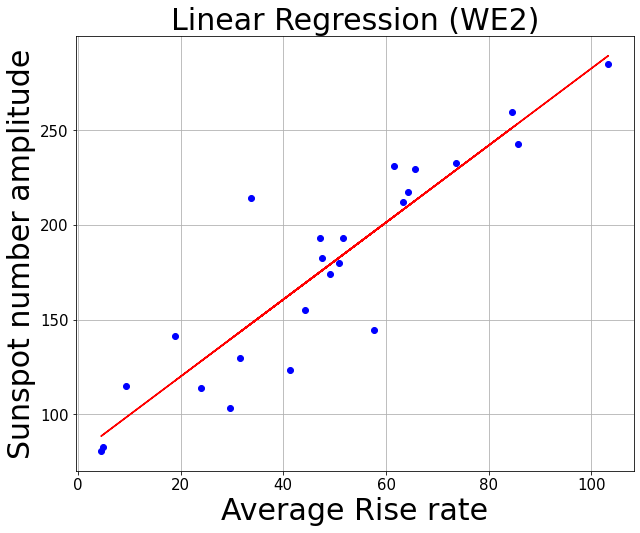

In [105]:
plt.figure(figsize=(10,8))
plt.plot(avg_rise_rates,max_array,'bo')
plt.ylabel('Sunspot number amplitude',fontsize=30)
plt.xlabel('Average Rise rate',fontsize=30)
plt.title('Linear Regression (WE2)',fontsize=30)
plt.plot(avg_rise_rates,prediction,'-r')
plt.grid()
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.show()

In [83]:
prediction

array([[117.81269736],
       [184.20152096],
       [251.24552455],
       [229.23885955],
       [ 89.34643394],
       [ 88.39298637],
       [ 98.12621574],
       [253.57769632],
       [147.65775367],
       [176.05263915],
       [204.41028102],
       [163.35598264],
       [196.43940282],
       [139.49234865],
       [179.32119927],
       [143.62420454],
       [175.2941731 ],
       [209.94690987],
       [289.54515705],
       [169.11965465],
       [212.87747491],
       [208.03928884],
       [182.67874639],
       [128.14679955]])

In [84]:
max_array

[141.3290431973292,
 193.34942071371023,
 259.72490276836885,
 232.77336139337268,
 82.8184758443654,
 80.54390280708435,
 114.9244146300169,
 243.04885939733174,
 214.43640437723872,
 182.36656277939983,
 231.1321426799071,
 123.23329416523626,
 144.28711251697064,
 103.55555475570733,
 174.20453062249462,
 129.84763024451334,
 193.12467560403002,
 217.23972100861454,
 285.3894098552806,
 155.03306525603944,
 229.84730116163095,
 212.2433864349246,
 179.7352922866852,
 113.75548640548753]

In [85]:
s=np.array(mean_slopes[-1]).reshape(-1,1)

In [86]:
s

array([[28.60899913]])

# Prediction for 25th cycle:

In [87]:
model.predict(s) 

array([[137.43641075]])

## Standard deviation:

# Proxy Polar field and Sunspot count amplitude correlation:

In [86]:
polar_field_max= np.loadtxt("proxy polar field maxima.txt")
polar_field_max

array([[1920.77706311,    6.8863985 ],
       [1932.36288979,    7.95333536],
       [1943.31332912,   13.25512138],
       [1952.846896  ,   19.49709166],
       [1964.23149371,    7.74035819],
       [1975.06615747,   12.92441608],
       [1985.22959858,   15.40212157],
       [1994.191179  ,   10.46722071]])

In [87]:
maxima_time_polar=max_times[-9:-1]

In [88]:
maxima_time_polar

[1928.456,
 1937.455,
 1947.538,
 1957.874,
 1969.123,
 1979.958,
 1989.707,
 2001.874]

In [89]:
max_array_polar= max_array[-9:-1]
max_array_polar

[129.84763024451334,
 193.12467560403002,
 217.23972100861454,
 285.3894098552806,
 155.03306525603944,
 229.84730116163095,
 212.2433864349246,
 179.7352922866852]

In [90]:
polar_field_maxima= polar_field_max[0:,1]

In [91]:
polar_field_maxima

array([ 6.8863985 ,  7.95333536, 13.25512138, 19.49709166,  7.74035819,
       12.92441608, 15.40212157, 10.46722071])

In [92]:
from scipy.stats import pearsonr

corr_polar,_= pearsonr(polar_field_maxima,max_array_polar)
corr_polar

0.9189937549034213

In [66]:
polar_data= np.loadtxt("polar_smooth.txt")
polar_data

array([[1.91510130e+03, 1.35301212e+00],
       [1.91545552e+03, 1.11796605e+00],
       [1.91604129e+03, 1.11837625e+00],
       ...,
       [1.99839149e+03, 1.94075034e+00],
       [1.99874571e+03, 1.70570428e+00],
       [1.99886355e+03, 1.64696327e+00]])

In [67]:
time_polar= polar_data[0:,0]
field_polar= polar_data[0:,1]

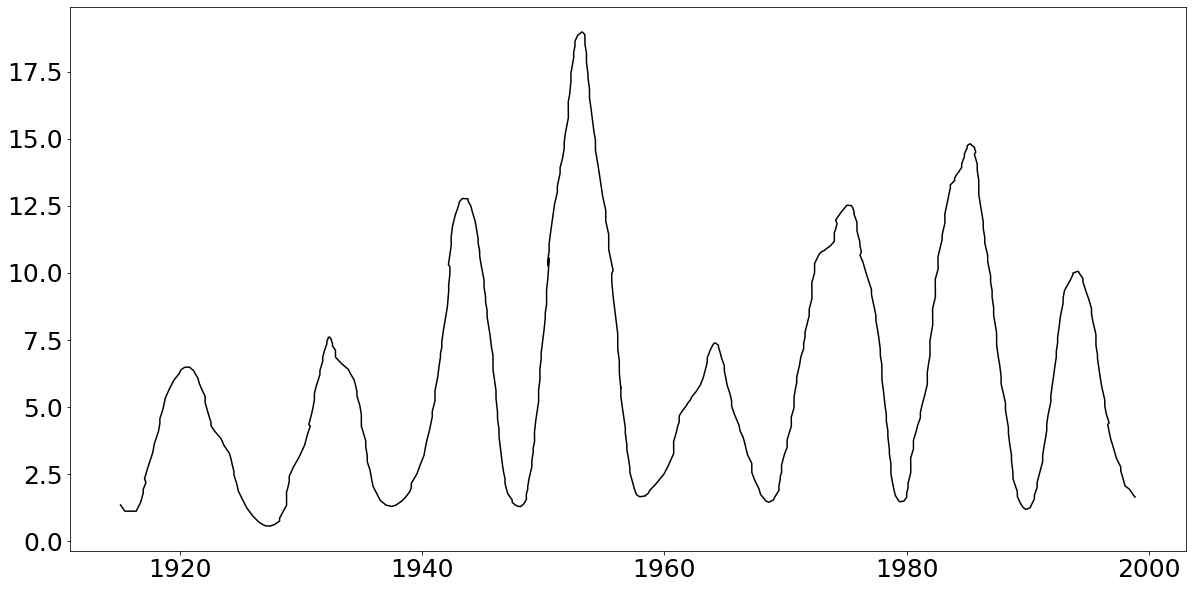

In [68]:
plt.figure(figsize=(20,10))
plt.plot(time_polar, field_polar,'k')
plt.show()

In [69]:
### for local minima

from scipy.signal import argrelmin

min= argrelmin(field_polar, order=5)

min

(array([  1,  56, 118, 196, 316, 376, 475, 575]),)

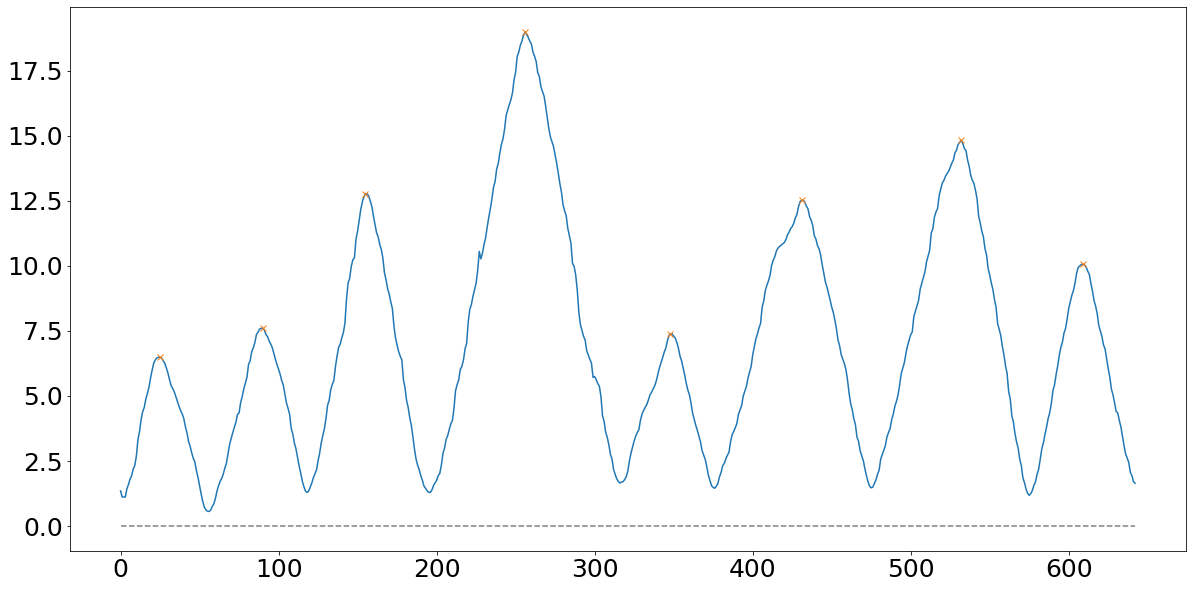

In [70]:
from scipy.signal import find_peaks

# for local maxima

plt.figure(figsize=(20,10))
peaks, _ = find_peaks(field_polar,distance=50)
plt.plot(field_polar)
plt.plot(peaks, field_polar[peaks], "x")
plt.plot(np.zeros_like(field_polar), "--", color="gray")
#plt.plot(min,min_array,"x")
plt.show()

In [71]:
max_array_polar=[]
#max_array= np.array(max_array)
min_array_polar=[]
#min_array= np.array(min_array)

In [72]:
for i in peaks:
    q= field_polar[i]
    max_array_polar.append(q)
    
print(max_array_polar)

[6.4912909545291875, 7.610783950126967, 12.77604256419764, 18.988500002167047, 7.388135304873325, 12.524631410625249, 14.81982001471358, 10.05781525857312]


In [73]:
for i in min:
    q= field_polar[i]
    min_array_polar.append(q)
    
print(min_array_polar)

[array([1.11796605, 0.56268451, 1.29501112, 1.29277741, 1.65630863,
       1.4542321 , 1.4714111 , 1.18258894])]


In [74]:
max_times_polar=[]
min_times_polar=[]

In [75]:
for i in peaks:
    q= time_polar[i]
    max_times_polar.append(q)
    
print(max_times_polar)

[1920.77706311377, 1932.36288979498, 1943.31332912192, 1953.20042496985, 1964.11502900132, 1975.06615746856, 1985.22959857578, 1994.19117900419]


In [76]:
for i in min:
    q= time_polar[i]
    min_times_polar.append(q)
    
print(min_times_polar)

[array([1915.45552174, 1927.4155516 , 1937.48044564, 1948.14351347,
       1957.98099121, 1968.64199162, 1979.42152415, 1989.85028427])]


In [77]:
time_polar_rounded= np.round(time_polar,decimals=2)

In [78]:
time_polar_rounded[0]

1915.1

In [79]:
rise_rate_polar1=[]
rise_rate_polar2=[]
rise_rate_polar3=[]

for i in min:
    p= i+1
    a= time_polar_rounded[p]
    b= time_polar_rounded[i]
    if a.all()>b.all():
        db= field_polar[p]-field_polar[i]
        dt= time_polar_rounded[p]-time_polar_rounded[i]
        slope= db/dt
        rise_rate_polar1.append(slope)
    elif a.all()<=b.all():
        while p.all()<642:
            p= p+1
            if a.all()>b.all():
                break
        db= field_polar[p]-field_polar[i]
        dt= time_polar_rounded[p]-time_polar_rounded[i]
        slope= db/dt
        rise_rate_polar1.append(slope)    

In [80]:
#for rise_rate_polar1:

ind1= [2,4,3,10,5,7,10,7]
next_ind1= min+ np.array(ind1)
next_ind1

array([[  3,  60, 121, 206, 321, 383, 485, 582]])

In [81]:
z=0

for i in min:
    i_= next_ind1[z]
    db= field_polar[i_]-field_polar[i]
    dt= time_polar[i_]-time_polar[i]
    slope= db/dt
    rise_rate_polar1.append(slope)
    z=z+1

In [82]:
rise_rate_polar1

[array([7.00280112e-04, 4.69318655e-01, 3.02636829e-01, 1.97611650e+00,
        3.56887679e-01, 1.07654797e+00, 1.71811836e+00, 1.21096183e+00])]

In [83]:
from scipy.stats import pearsonr

corr1_polar,_= pearsonr(rise_rate_polar1[0],max_array_polar)
corr1_polar

0.8426527865188136

In [84]:
min_times_polar

[array([1915.45552174, 1927.4155516 , 1937.48044564, 1948.14351347,
        1957.98099121, 1968.64199162, 1979.42152415, 1989.85028427])]

In [85]:
#for rise_rate_polar2:

ind2= [9,12,7,25,6,18,18,15]
next_ind2= min+ np.array(ind2)
next_ind2

array([[ 10,  68, 125, 221, 322, 394, 493, 590]])

In [86]:
z=0

for i in min:
    i_= next_ind2[z]
    db= field_polar[i_]-field_polar[i]
    dt= time_polar[i_]-time_polar[i]
    slope= db/dt
    rise_rate_polar2.append(slope)
    z=z+1

In [87]:
rise_rate_polar2

[array([0.84374505, 1.12453287, 0.58200853, 3.47285231, 0.42554117,
        1.70846072, 1.91647426, 1.95292187])]

In [88]:
corr2_polar,_= pearsonr(rise_rate_polar2[0],max_array_polar)
corr2_polar

0.7966381040281979

In [89]:
min_times_polar

[array([1915.45552174, 1927.4155516 , 1937.48044564, 1948.14351347,
        1957.98099121, 1968.64199162, 1979.42152415, 1989.85028427])]

In [90]:
#for rise_rate_polar3:

ind3= [14,16,12,40,13,28,34,26]
next_ind3= min+ np.array(ind3)
next_ind3

array([[ 15,  72, 130, 236, 329, 404, 509, 601]])

In [91]:
z=0

for i in min:
    i_= next_ind3[z]
    db= field_polar[i_]-field_polar[i]
    dt= time_polar[i_]-time_polar[i]
    slope= db/dt
    rise_rate_polar3.append(slope)
    z=z+1

In [92]:
rise_rate_polar3

[array([1.19194127, 1.07336066, 0.90872685, 3.87763442, 0.80128622,
        2.07031285, 2.81781241, 2.51665312])]

In [93]:
corr3_polar,_= pearsonr(rise_rate_polar3[0],max_array_polar)
corr3_polar

0.8194019673242572

In [94]:
rise_rate_polar1_2=[]
rise_rate_polar1_3=[]

In [95]:
min_times_polar

[array([1915.45552174, 1927.4155516 , 1937.48044564, 1948.14351347,
        1957.98099121, 1968.64199162, 1979.42152415, 1989.85028427])]

In [96]:
# for rise_rate_polar1_2:

z=0

for i in min:
    i_= next_ind2[z]
    i_initial=next_ind1[z]
    db= field_polar[i_]-field_polar[i_initial]
    dt= time_polar[i_]-time_polar[i_initial]
    slope= db/dt
    rise_rate_polar1_2.append(slope)
    z=z+1

In [97]:
rise_rate_polar1_2

[array([1.70645453, 1.87518584, 0.93387147, 5.0182372 , 0.55045144,
        2.34502611, 2.16423257, 2.8968756 ])]

In [98]:
corr4_polar,_= pearsonr(rise_rate_polar1_2[0],max_array_polar)
corr4_polar

0.705857061460897

In [99]:
# for rise_rate_polar1_3:

z=0

for i in min:
    i_= next_ind3[z]
    i_initial=next_ind1[z]
    db= field_polar[i_]-field_polar[i_initial]
    dt= time_polar[i_]-time_polar[i_initial]
    slope= db/dt
    rise_rate_polar1_3.append(slope)
    z=z+1

In [100]:
rise_rate_polar1_3

[array([1.76380422, 1.39577127, 1.26935787, 4.858957  , 1.12875637,
        2.60312943, 3.5169668 , 3.35231553])]

In [101]:
corr5_polar,_= pearsonr(rise_rate_polar1_3[0],max_array_polar)
corr5_polar

0.7966915744208374

In [102]:
avg_riserate_polar= (rise_rate_polar1[0]+rise_rate_polar2[0]+rise_rate_polar3[0]+rise_rate_polar1_3[0])/4
avg_riserate_polar

array([0.95004771, 1.01574587, 0.76568252, 3.54639006, 0.67811786,
       1.86461274, 2.49234296, 2.25821309])

In [103]:
avg_corr_polar,_= pearsonr(avg_riserate_polar,max_array_polar)
avg_corr_polar

0.8220693117043854

In [105]:
np.savetxt('AT index',np.vstack((max_array_polar,rise_rate_polar1,rise_rate_polar2,rise_rate_polar3,rise_rate_polar1_3)).T,fmt='% 10.4f %10.4f %10.4f %10.4f %10.4f')